<a href="https://colab.research.google.com/github/xCosmicx/ATA/blob/main/assignment/203330R_ATA_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Importing Necessary Packages and Libraries


In [2]:
import os
import tensorflow as tf
import keras as keras
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Step 2: Download Datasets
Downloading of the dataset and unziping the file to a folder.

In [3]:
dataset_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
path_to_zip = tf.keras.utils.get_file('flower_photos.tgz', origin=dataset_url, extract=True, cache_dir='.')
print(path_to_zip)
PATH = os.path.join(os.path.dirname(path_to_zip), 'flower_photos')
print(PATH)

228827136/228813984 [==============================] - 2s 0us/step
./datasets/flower_photos.tgz
./datasets/flower_photos


# Step 3: Setting Up Directory

In [4]:
# daisy_dir = os.path.join(PATH, "daisy")
# dandelion_dir = os.path.join(PATH, "dandelion")
# roses_dir = os.path.join(PATH, "roses")
# sunflowers_dir = os.path.join(PATH, "sunflowers")
# tulips_dir = os.path.join(PATH, "tulips")
# print('Total daisy images:', len(os.listdir(daisy_dir)))
# print('Total dandelion images:', len(os.listdir(dandelion_dir)))
# print('Total roses images:', len(os.listdir(roses_dir)))
# print('Total sunflowers images:', len(os.listdir(sunflowers_dir)))
# print('Total tulips images:', len(os.listdir(tulips_dir)))

train_ds = tf.keras.utils.image_dataset_from_directory(
  PATH,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(180, 180),
  batch_size=32)

val_ds = tf.keras.utils.image_dataset_from_directory(
  PATH,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(180, 180),
  batch_size=32)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


# Step 4: Building/Creating of Model

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


# model = tf.keras.Sequential([
#   tf.keras.layers.Rescaling(1./255),
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(5, activation='softmax')
# ])


model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5, activation='softmax'),
])

# Step 5: Compiling and Training of Model

In [6]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [7]:
history = model.fit(
    train_ds,
    epochs=15,
    validation_data=val_ds,
    validation_steps=20)

Epoch 1/15
92/92 [==============================] - 203s 2s/step - loss: 1.6039 - accuracy: 0.2435 - val_loss: 1.5291 - val_accuracy: 0.3406
Epoch 2/15
92/92 [==============================] - 194s 2s/step - loss: 1.4649 - accuracy: 0.3770 - val_loss: 1.2434 - val_accuracy: 0.5203
Epoch 3/15
92/92 [==============================] - 196s 2s/step - loss: 1.2885 - accuracy: 0.4608 - val_loss: 1.1934 - val_accuracy: 0.4984
Epoch 4/15
92/92 [==============================] - 199s 2s/step - loss: 1.1797 - accuracy: 0.5283 - val_loss: 1.0767 - val_accuracy: 0.5375
Epoch 5/15
92/92 [==============================] - 184s 2s/step - loss: 1.1282 - accuracy: 0.5439 - val_loss: 0.9788 - val_accuracy: 0.5922
Epoch 6/15
92/92 [==============================] - 179s 2s/step - loss: 1.0410 - accuracy: 0.5862 - val_loss: 0.9704 - val_accuracy: 0.5859
Epoch 7/15
92/92 [==============================] - 178s 2s/step - loss: 0.9999 - accuracy: 0.5930 - val_loss: 1.2525 - val_accuracy: 0.5453
Epoch 8/15
92

# Step 6: Visualising of Model
Shows the accuracy and loss of the model

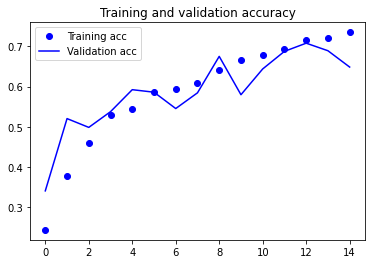

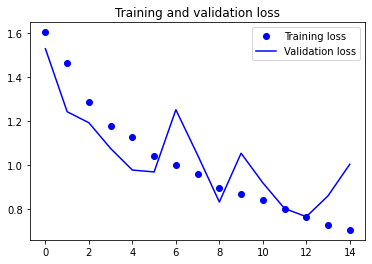

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend ()

plt.figure()

plt.plot (epochs, loss, 'bo', label='Training loss')
plt.plot (epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()

# Step 7: Saving of Model

In [9]:
model.save("flower_model")

INFO:tensorflow:Assets written to: flower_model/assets


# Step 8: Testing of Model


In [11]:
# upload image to test
uploaded = files.upload()

# take only the first image
filename = list(uploaded.keys())[0]

img = tf.keras.preprocessing.image.load_img(
    filename, target_size=(180, 180)
)

# convert the image to numpy array
img_array = tf.keras.preprocessing.image.img_to_array(img)

# create a batch
img_array = tf.expand_dims(img_array, 0)

# load the model saved earlier and do the inference 
model = tf.keras.models.load_model('flower_model')
predictions = model.predict(img_array)

# output image class
if predictions[0][0] > 0.5: 
    print('It is a daisy')
elif predictions[0][1] > 0.5:
  print('It is a dandelion')
elif predictions[0][2] > 0.5:
  print('It is a rose')
elif predictions[0][3] > 0.5:
  print('It is a sunflower')
elif predictions[0][4] > 0.5:
  print('It is a tulip')

Saving red-rose-on-black-background.jpg to red-rose-on-black-background.jpg
It is a rose
